패키지

In [20]:
# 분석
import pandas as pd
import numpy as np
import scipy.stats as stats
import string

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 머신러닝 패키지
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
df = pd.read_excel("./data/activity_sample.xlsx")
df

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,11,11,44,44,44,44,44,44,999,25
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,11,11,44,44,44,44,44,44,999,25
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,11,11,44,44,44,44,44,44,999,25
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,11,11,44,44,44,44,44,44,999,25
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,11,11,44,44,44,44,44,44,999,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.026,M,...,1,1,1,1,44,44,44,44,999,27
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:18.280,M,...,1,1,1,1,44,44,44,44,999,27
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.366,M,...,1,1,1,1,44,44,44,44,999,27
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:40.089,M,...,1,1,1,1,44,44,44,44,999,27


In [6]:
df.shape

(6476, 45)

In [4]:
for i in df.columns:
    print(i)

Unnamed: 0
userid
learning_seq
mcode
learning_action_seq
event_type
action
object_type
timestamp
gender
grade
memberstatus
memberstatus_change
day_01_status
day_02_status
day_03_status
day_04_status
day_05_status
day_06_status
day_07_status
day_08_status
day_09_status
day_10_status
day_11_status
day_12_status
day_13_status
day_14_status
day_15_status
day_16_status
day_17_status
day_18_status
day_19_status
day_20_status
day_21_status
day_22_status
day_23_status
day_24_status
day_25_status
day_26_status
day_27_status
day_28_status
day_29_status
day_30_status
day_31_status
change_date


중복, 결측치 확인

In [14]:
df['userid'].duplicated().sum()

6446

In [15]:
df['userid'].nunique()

# 30명에 대한 활동 데이터

30

In [18]:
df['userid'].unique()

array(['01cf7916-eb98-4d30-8c81-dd52aa5be060',
       '076bf224-16b8-48ca-b646-752a771b1dcc',
       '2bd83b70-6085-48d1-8433-6bef1f4fa584',
       '3a23c7e1-861a-41ce-a856-f16a4df5a5df',
       '4e478763-9937-4d47-b7da-a0113f860b52',
       '4ef416c9-de60-499e-b971-a780e076991e',
       '5b531894-59c3-4cf3-8fa4-eb1836fbd6b3',
       '676a004e-7c59-4edb-8af1-3bd963b98b29',
       '78d436d5-2adb-489b-bc1c-8c5b85d47d5c',
       '7aa6cf37-81af-4af8-a272-6a850e65e25c',
       '909c25d9-64ef-4e4f-b47f-4df50f02c07f',
       '91749c9e-af85-4f73-b252-2d05c04b508f',
       '943ee87d-d6d7-4ad4-b7dd-4ca171d8107e',
       'a11ea25b-593c-45f4-8c68-8e97b489e53a',
       'a130415d-5d44-4526-94bd-1a0892811572',
       'a3c0a30d-346f-4b58-967b-70ae79302871',
       'a9c80240-7734-401d-bddf-999d869e42a1',
       'b2d3b8c4-e954-4ed2-9078-c6c5493debea',
       'b3ddd47d-5c6f-44ba-9bd6-ff698a742f73',
       'b6d4d557-7343-4b61-8f06-ebbee45a0a81',
       'b8be7534-636b-4304-b3b2-ced246c3c1eb',
       'c25b0

In [9]:
df.isnull().sum()

Unnamed: 0             0
userid                 0
learning_seq           0
mcode                  0
learning_action_seq    0
event_type             0
action                 0
object_type            0
timestamp              0
gender                 0
grade                  0
memberstatus           0
memberstatus_change    0
day_01_status          0
day_02_status          0
day_03_status          0
day_04_status          0
day_05_status          0
day_06_status          0
day_07_status          0
day_08_status          0
day_09_status          0
day_10_status          0
day_11_status          0
day_12_status          0
day_13_status          0
day_14_status          0
day_15_status          0
day_16_status          0
day_17_status          0
day_18_status          0
day_19_status          0
day_20_status          0
day_21_status          0
day_22_status          0
day_23_status          0
day_24_status          0
day_25_status          0
day_26_status          0
day_27_status          0


결측치가 없다?

In [45]:
df['grade'].unique()

# 전부 5학년에 대한 데이터
# 즉 5학년 30명에 대한 자료이다

array([5], dtype=int64)

전처리

In [25]:
# 사람은 30명, 그 인원을 보다 쉽게 식별하기 위해서 변환시도

# 유니크 userid 추출
unique_userids = df['userid'].unique()

# stu1 ~ stu30까지의 리스트 생성
stu_labels = [f'stu{i}' for i in range(1, 31)]

# 유니크 userid와 stu 라벨을 매핑하는 딕셔너리 생성
userid_to_stu = dict(zip(unique_userids, stu_labels))

# userid를 stu 라벨로 변환한 새로운 컬럼 생성
df['userid_stu'] = df['userid'].map(userid_to_stu)

# 결과 확인
print(df[['userid', 'userid_stu']].head())

                                 userid userid_stu
0  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
1  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
2  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
3  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
4  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1


In [43]:
userid_counts = df['userid_stu'].value_counts()

# Box-Cox 변환 적용 (0 이상의 빈도수여야 적용 가능)
boxcox_transformed, _ = stats.boxcox(userid_counts)

# Box-Cox 변환된 값을 DataFrame에 추가
df_boxcox = pd.DataFrame({
    'userid_stu': userid_counts.index,
    'original_count': userid_counts.values,
    'boxcox_count': boxcox_transformed
})

# df에 병합 (필요할 경우)
df = df.merge(df_boxcox, on='userid_stu')

# 결과 확인
print(df.head())

   Unnamed: 0                                userid  learning_seq  \
0        6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1        6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2        6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3        6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4        6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   

          mcode  learning_action_seq       event_type       action  \
0  T0TE52U01003                    1        ViewEvent       Viewed   
1  T0TE52U01003                    2  NavigationEvent  NavigatedTo   
2  T0TE52U01003                    3        ViewEvent       Viewed   
3  T0TE52U01003                    4  NavigationEvent  NavigatedTo   
4  T0TE52U01003                    5        ViewEvent       Viewed   

       object_type               timestamp gender  ...  day_28_status  \
0  DigitalResource 2022-09-14 23:28:53.150      M  ...             44   
1  DigitalResource

EDA

In [24]:
df['userid_alpha'].nunique()

26

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

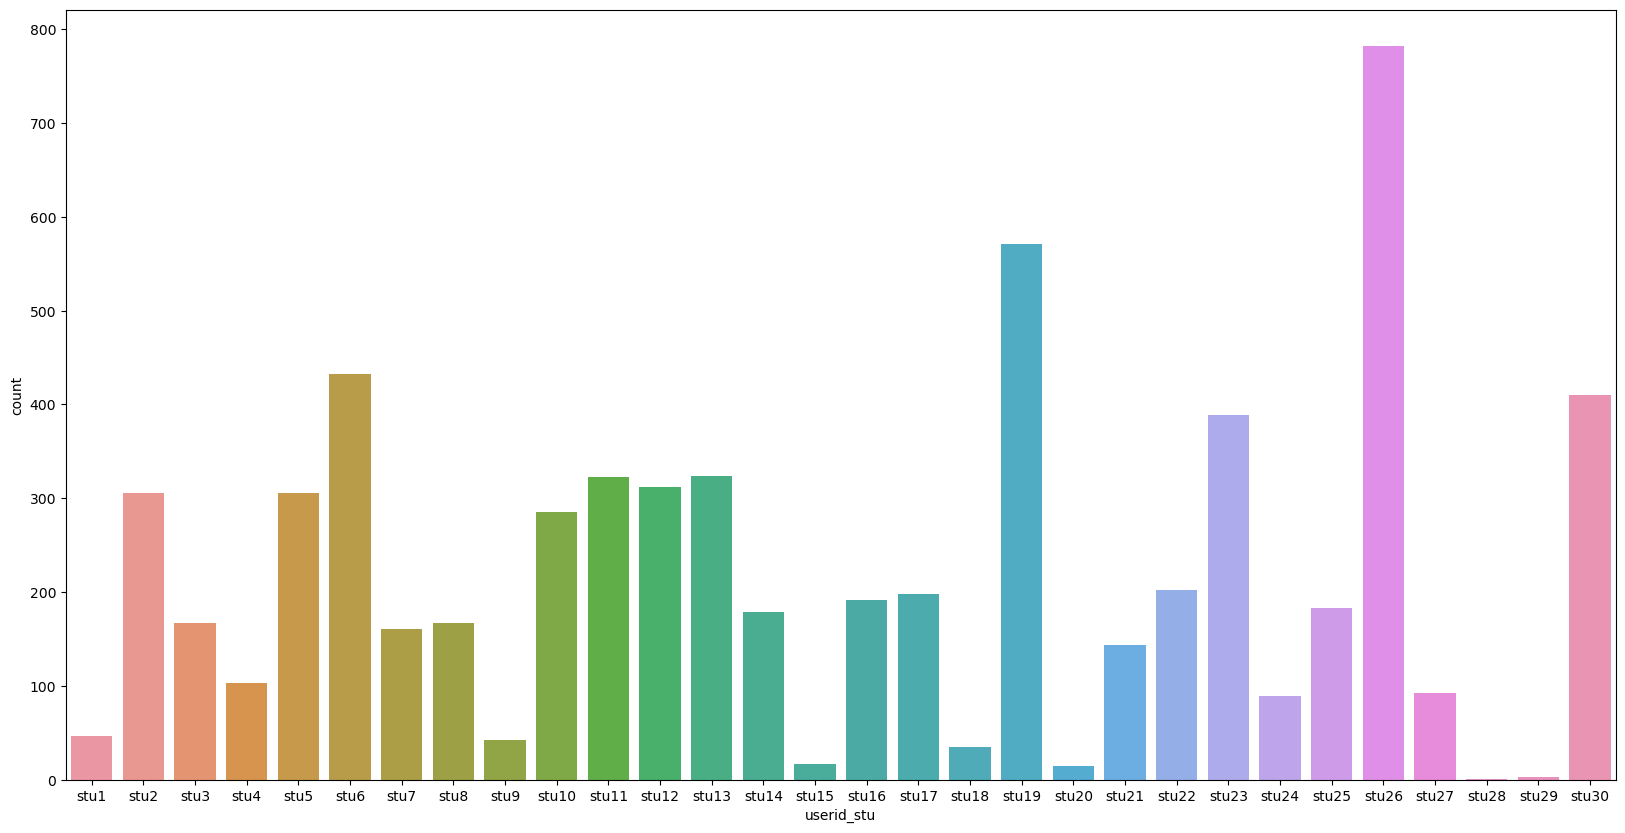

In [31]:
plt.figure(figsize=(20,10))

sns.countplot(x='userid_stu', data=df)

# 플롯을 표시
plt.show()

30명에 대한 자료가 편향적임

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

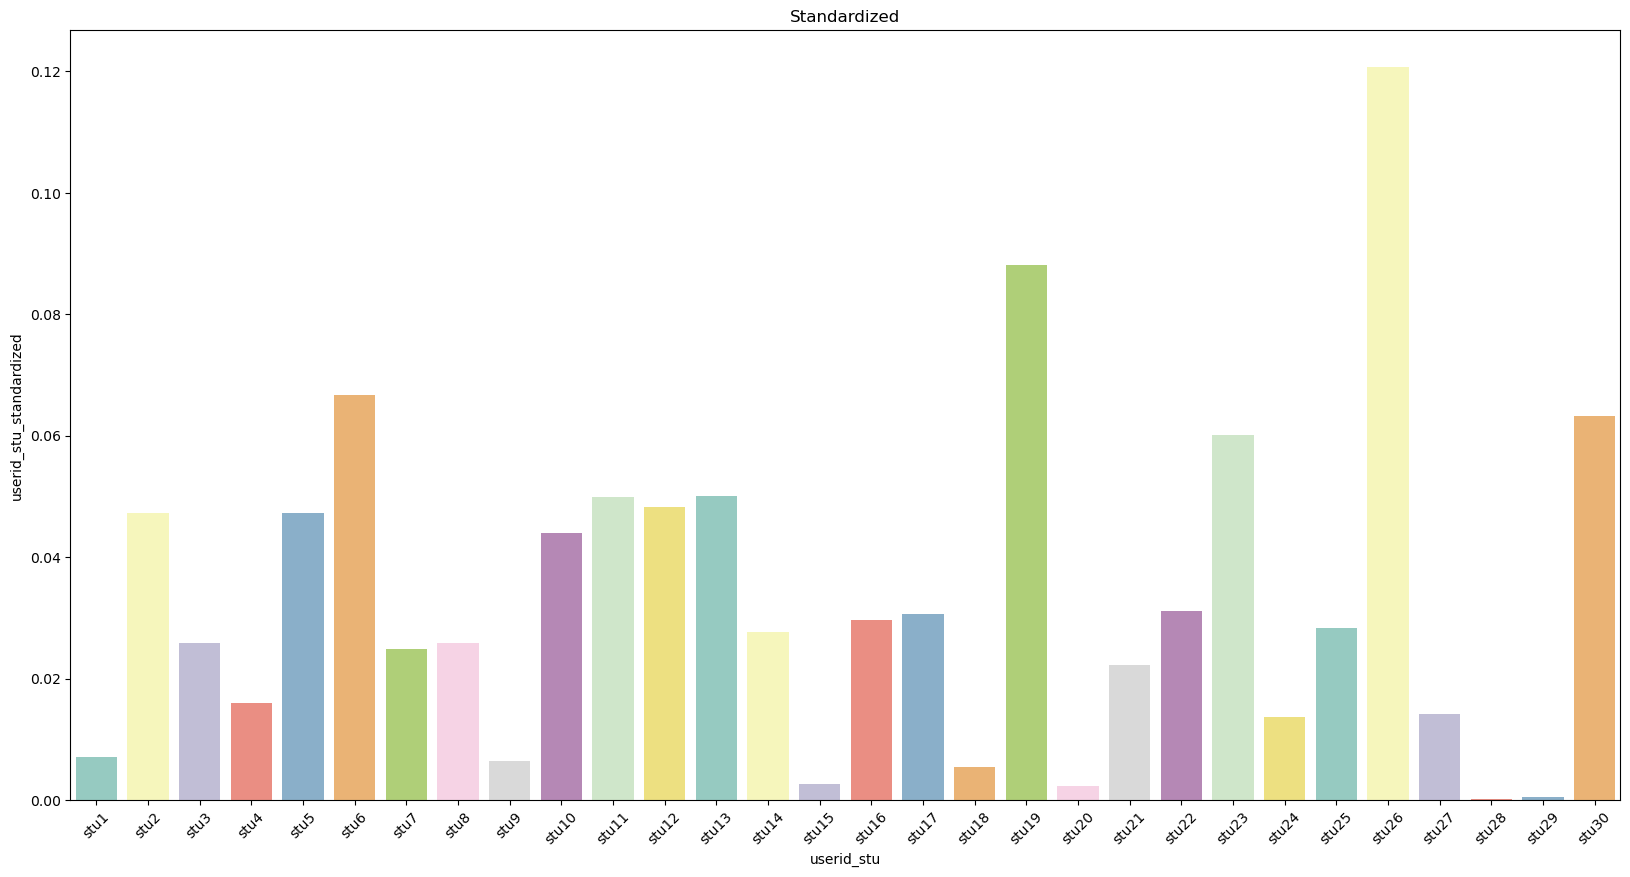

In [40]:
# 전체 행의 수
total_count = len(df)

# 각 stu 라벨의 빈도를 표준화하여 비율 계산
df['userid_stu_standardized'] = df['userid_stu'].map(df['userid_stu'].value_counts() / total_count)

# 표준화된 값으로 플롯을 그림
plt.figure(figsize=(20,10))
sns.barplot(x='userid_stu', y='userid_stu_standardized', data=df, palette='Set3')

# x축 라벨 회전

plt.xticks(rotation=45)
plt.title('Standardized')
# 표준화된 플롯을 표시
plt.show()

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumG

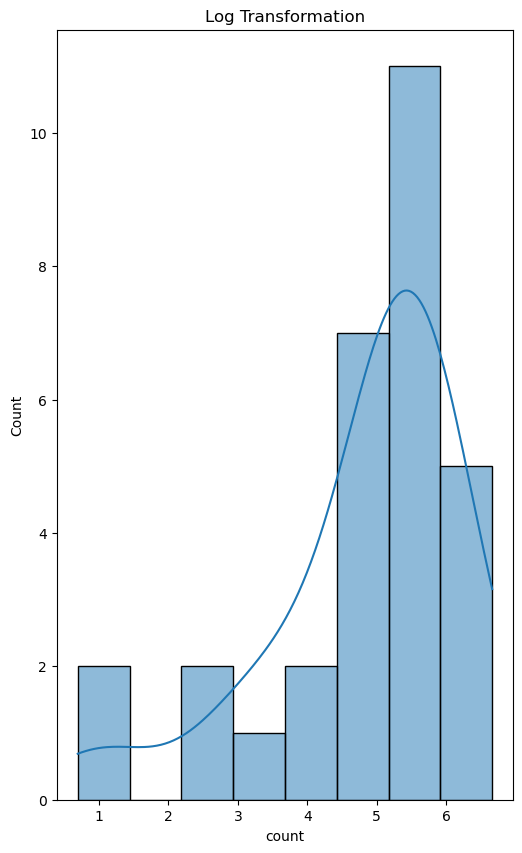

In [39]:
# Box-Cox 변환은 양수 값에만 적용 가능

userid_counts = df['userid_stu'].value_counts()
log_transformed = np.log1p(userid_counts)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.histplot(log_transformed, kde=True)
plt.title('Log Transformation')
plt.show()

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box-Cox Transformation')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

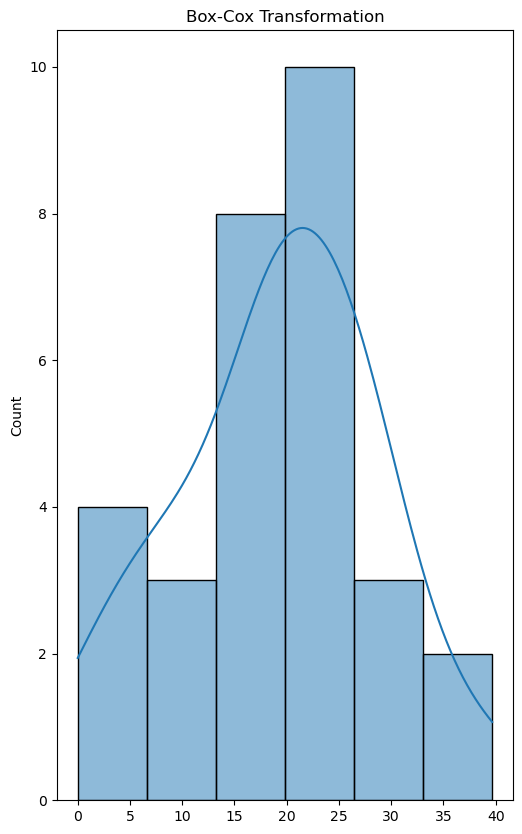

In [42]:
# Box-Cox 변환은 양수 값에만 적용 가능
boxcox_transformed, _ = stats.boxcox(userid_counts)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 2)
sns.histplot(boxcox_transformed, kde=True)
plt.title('Box-Cox Transformation')